In [3]:
from textblob import TextBlob

text = '''Here is the most simple example of a sentence. The rest of the text is autogenerated. This gives the program some time to perform its computations and then tries to find the shortest possible   possible sentence. Finally, let's look at the output that is used for the rest of the process.'''

blob = TextBlob(text)
blob.tags
blob.noun_phrases
for i in blob.sentences:
    print(i.sentiment.polarity)

0.25
0.0
-0.03333333333333333
0.0


In [6]:
import python_pachyderm

client = python_pachyderm.Client()
client.create_repo("data")
print(list(client.list_repo()))

[repo {
  name: "data"
  type: "user"
}
created {
  seconds: 1639198986
  nanos: 943869000
}
auth_info {
  permissions: REPO_READ
  permissions: REPO_INSPECT_COMMIT
  permissions: REPO_LIST_COMMIT
  permissions: REPO_LIST_BRANCH
  permissions: REPO_LIST_FILE
  permissions: REPO_INSPECT_FILE
  permissions: REPO_ADD_PIPELINE_READER
  permissions: REPO_REMOVE_PIPELINE_READER
  permissions: PIPELINE_LIST_JOB
  permissions: REPO_WRITE
  permissions: REPO_DELETE_COMMIT
  permissions: REPO_CREATE_BRANCH
  permissions: REPO_DELETE_BRANCH
  permissions: REPO_ADD_PIPELINE_WRITER
  permissions: REPO_MODIFY_BINDINGS
  permissions: REPO_DELETE
  permissions: CLUSTER_DEBUG_DUMP
  permissions: CLUSTER_GET_PACHD_LOGS
  permissions: CLUSTER_CREATE_SECRET
  permissions: CLUSTER_LIST_SECRETS
  permissions: SECRET_INSPECT
  permissions: SECRET_DELETE
  permissions: CLUSTER_AUTH_GET_ROBOT_TOKEN
  roles: "repoOwner"
}
]


In [ ]:
with client.commit('data', 'master') as i:
     client.put_file_url(i, 'data.csv', 'https://raw.githubusercontent.com/PacktPublishing/Reproducible-Data-Science-with-Pachyderm/main/Chapter11-Using-Pachyderm-Notebooks/data.csv')
print(list(client.list_file(("data", "master"), "")))

In [8]:
list(client.list_file(("data", "master"), ""))

[file {
   commit {
     branch {
       repo {
         name: "data"
         type: "user"
       }
       name: "master"
     }
     id: "8488f655222e4d10b2e8872a1333d790"
   }
   path: "/data.csv"
   datum: "default"
 }
 file_type: FILE
 committed {
   seconds: 1639189561
   nanos: 412125000
 }
 size_bytes: 7310675
 hash: "\255j\351\263\017\303L\307\320e\303\2418\262v\006VNE\027\302|\224\221\006VH\363\033[\177\021"]

In [9]:
from python_pachyderm.service import pps_proto

client.create_pipeline(
     pipeline_name="data-clean",
     transform=pps_proto.Transform(
         cmd=["python3", "data-clean.py"],
         image="svekars/pachyderm-ide:1.0",
     ),
     input=pps_proto.Input(
         pfs=pps_proto.PFSInput(glob="/", repo="data")
     ),
)
client.create_pipeline(
     pipeline_name="sentiment",
     transform=pps_proto.Transform(
         cmd=["python3", "sentiment.py"],
         image="svekars/pachyderm-ide:1.0",
     ),
     input=pps_proto.Input(
         pfs=pps_proto.PFSInput(glob="/", repo="data-clean")
     ),
)
print(list(client.list_pipeline()))


[pipeline {
  name: "sentiment"
}
version: 1
spec_commit {
  branch {
    repo {
      name: "sentiment"
      type: "spec"
    }
    name: "master"
  }
  id: "7fd4f528982e470c8d8b7bf9f8d79d1b"
}
state: PIPELINE_STARTING
job_counts {
  key: 1
  value: 1
}
last_job_state: JOB_CREATED
parallelism: 1
type: PIPELINE_TYPE_TRANSFORM
details {
  transform {
    image: "svekars/pachyderm-ide:1.0"
    cmd: "python3"
    cmd: "sentiment.py"
  }
  created_at {
    seconds: 1639189899
    nanos: 488216999
  }
  output_branch: "master"
  input {
    pfs {
      name: "data-clean"
      repo: "data-clean"
      branch: "master"
      glob: "/"
      repo_type: "user"
    }
  }
  salt: "a0fd1561ee934554b6d87e92a8797d3a"
  datum_tries: 3
  reprocess_spec: "until_success"
}
, pipeline {
  name: "data-clean"
}
version: 1
spec_commit {
  branch {
    repo {
      name: "data-clean"
      type: "spec"
    }
    name: "master"
  }
  id: "ccd0773f74c84e068b710a3721d9a3f6"
}
state: PIPELINE_STARTING
job_coun

In [10]:
import pandas as pd
pd.read_csv(client.get_file(("data-clean", "master"), "cleaned-data.csv"), nrows=10)


,Unnamed: 0,text
0,0,"['She', 'believed', 'could', 'internationalwom..."
1,1,"['Knocking', 'park', 'maryannehobbs', 'Listeni..."
2,2,"['Happy', 'International', 'Women', 'Day', 'To..."
3,3,"['Happy', 'InternationalWomensDay', 'You', 'po..."
4,4,"['Listen', 'experimental', 'podcast', 'recorde..."
5,5,"['InternationalWomensDay', 'brough', 'https']"
6,6,"['Women', 'girls', 'crisis', 'zones', 'face', ..."
7,7,"['Happy', 'InternationalWomensDay', 'women', '..."
8,8,"['In', 'Nairobi', 'Female', 'Coders', 'Are', '..."
9,9,"['We', 'celebrating', 'International', 'Women'..."


In [11]:
list(client.list_file(("sentiment","master"), ""))

[file {
   commit {
     branch {
       repo {
         name: "sentiment"
         type: "user"
       }
       name: "master"
     }
     id: "7fd4f528982e470c8d8b7bf9f8d79d1b"
   }
   path: "/number_of_tweets.txt"
   datum: "e257138c32880b193c75ae71ffec27f4947717e3bcfb2519d6d84891be64fbb5"
 }
 file_type: FILE
 committed {
   seconds: 1639189978
   nanos: 263017000
 }
 size_bytes: 97
 hash: "+:\26349j&T\305)c\362\314\263\300\033g\337D\273\351\237\375*,\264\267g;\2159\000",
 file {
   commit {
     branch {
       repo {
         name: "sentiment"
         type: "user"
       }
       name: "master"
     }
     id: "7fd4f528982e470c8d8b7bf9f8d79d1b"
   }
   path: "/plot.png"
   datum: "e257138c32880b193c75ae71ffec27f4947717e3bcfb2519d6d84891be64fbb5"
 }
 file_type: FILE
 committed {
   seconds: 1639189978
   nanos: 263017000
 }
 size_bytes: 27799
 hash: "\331f\254\306\333\020\034\007\352\\~E\215S\323i\220\365\211>UHl\374}u\022?\336\3052q",
 file {
   commit {
     branch {
       repo

In [12]:
pd.read_csv(client.get_file(("sentiment","master"), "polarity.csv"), nrows=10)

,Unnamed: 0,text,polarity_score,sentiment
0,0,"['She', 'believed', 'could', 'internationalwom...",0.0000,Neutral
1,1,"['Knocking', 'park', 'maryannehobbs', 'Listeni...",0.2500,Positive
2,2,"['Happy', 'International', 'Women', 'Day', 'To...",0.4000,Positive
3,3,"['Happy', 'InternationalWomensDay', 'You', 'po...",0.5375,Positive
4,4,"['Listen', 'experimental', 'podcast', 'recorde...",0.1000,Positive
5,5,"['InternationalWomensDay', 'brough', 'https']",0.0000,Neutral
6,6,"['Women', 'girls', 'crisis', 'zones', 'face', ...",0.0000,Neutral
7,7,"['Happy', 'InternationalWomensDay', 'women', '...",0.6500,Positive
8,8,"['In', 'Nairobi', 'Female', 'Coders', 'Are', '...",0.0000,Neutral
9,9,"['We', 'celebrating', 'International', 'Women'...",0.0000,Neutral


In [13]:
client.get_file(("sentiment", "master"),"number_of_tweets.txt").read()

b'Number of Positive tweets: 31012\nNumber of Neutral tweets: 17532\nNumber of Negative tweets: 2936\n'

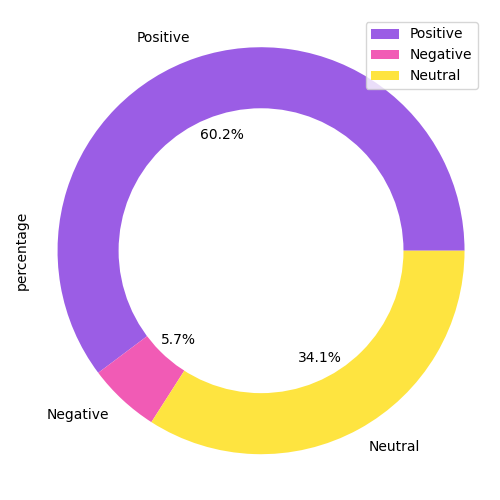

In [14]:
from IPython.display import display
from PIL import Image
display(Image.open(client.get_file(("sentiment", "master"), "/plot.png")))